## Hospital Rating Classification

Here's a brief background of the business problem

Problem Background
The Centers for Medicare & Medicaid Services (CMS) is an agency of the U.S. Department of Health and Human Services (HHS) which administers the major government health programs in the U.S. This includes insurance programs such as Medicare, Medicaid, and the Children’s Health Insurance Program (CHIP). CMS also plays an important role in collecting and analyzing data with the goal of improving efficiency and equity in the healthcare system. In the current project, you will be analyzing CMS data on hospital quality.  

 

CMS rates hospitals in the U.S. on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by hospitals. CMS conducts surveys each year and keeps on updating the ratings to reflect the current services being delivered by each of the hospitals.

 

The ratings directly influence the choice of hospitals made by consumers and may significantly impact hospitals' revenues. This project is focused on developing an approach to calculate hospital ratings and using it to identify areas of improvement for hospitals.

Problem Statement
You are working as a consultant for a non-profit organization in the US that provides recommendations to hospitals on areas they need to improve so that they can get a better rating from CMS. This would affect the overall hospital revenue as well as improve the quality of life for the patients. Also, for hospitals that are yet to be rated, you can pre-emptively help them by providing a tentative rating based on their current services and suggesting where they need to invest more in improvement.

Here's a quick overview of the columns available in the data set 'hospital-info.csv':

Hospital Demographic Information: This includes Provider ID (or, in other words, the Hospital ID), Hospital Name, Zip, Area, State, etc.
Hospital overall rating: Overall rating of the hospital. By default, CMS rates hospitals on ratings 1-5.
Hospital Quality Information: These are the columns that describe the scores received by hospitals based on different quality measures. These quality measures as defined by CMS (as per the year when the data was collected) are as follows:
Mortality
Safety of Care
Readmission
Patient Experience
Effectiveness of Care
Timeliness of Care
Efficient Use of Medical Imaging                                                         
Each qualitative measure has been quantified in 2 ways:
Measure national comparison: For e.g., for a hospital's Mortality score, you can refer to the column 'Mortality National Comparison'. The score information can be understood as follows:
A score of 2 indicates the hospital performs better than the national average
A score of 1 indicates the hospital's performance is similar to the national average
A score of 0 indicates the hospital's performance is worse than the national average
Sub-Measure level information: For each of the measures, you also have the information of their sub-measures and their respective scores as well. This has been encoded in the following format: For e.g., for a hospital's Mortality sub-measure, you can find them in all the columns which have a MORT prefix in them (like MORT_30_AMI_Score). Each of the sub-measures has a  combined effect on the overall measure rating of a hospital.
 

Understanding the Measures/Sub-Measures

For this project, we have designed the scope so that a detailed understanding of the measures or sub-measures is not necessary for completing the tasks or providing recommendations. However, the measure and sub-measure names may seem unintuitive at first glance. And to help you understand the same, here's a brief explanation:

For example, take the "Efficient Use of Medical Imaging" measure. It measures the overall capability of a hospital to perform specific imaging procedures such as CT scans, MRI scans, etc. It has the following sub-measures:

MED_OP_10_Score
MED_OP_11_Score
MED_OP_13_Score
MED_OP_14_Score
MED_OP_8_Score
MED_OP_9_Score
Each of the above scores is mapped to one of the individual procedures. For e.g. MED_OP_10_Score refers to CT scan, MED_OP_11_Score may refer to MRI scans, and so on.

For this measure, a hospital would be:

scored for each of its individual sub-measures
and also have a "national comparison rating"  where its facilities are compared to the national average for that measure.
An intuitive way to understand the relationship might be that a hospital not having most of the imaging procedure facilities would have lower individual sub-measure scores, and there's a high chance tat its overall measure's national comparison rating would also be low.

# Import the necessary Libraries

In [5]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [6]:
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

In [24]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [30]:
import plotly.express as px

## Understand the data

In [33]:
df = pd.read_csv('hospital-info.csv')
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,3,1,2,1,0,1,1,1,-12.500000,-4.200000,-9.3,-12.4,-15.5,-15.40000,1.0,16.500000,15.10000,21.1,21.4,5.100000,15.4,18.7,12.700000,-99.0,-8.255205,-2.0,-269.0,-68.0,97.0,81.0,-196.0,-65.0,-4.0,72.820855,82.0,96.12304,-0.000000,99.00000,96.000000,100.000000,67.000000,98.00000,99.000000,97.0,99.00000,91.000000,90.000000,-0.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000,-3.800000,-3.320000,-5.720000,-2.720000,-1.35,-0.07,-168.260000,-0.36,-0.12,-0.68,-1.740000,-2.433000,-1.427000,-2.307000,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,3,0,1,2,1,1,2,0,-16.000000,-3.331371,-7.6,-15.5,-20.8,-15.50000,1.0,16.700000,14.40761,18.0,21.9,5.700000,14.9,16.4,13.400000,-60.0,-12.000000,-3.0,-243.0,-71.0,99.0,83.0,-117.0,-27.0,-2.0,92.000000,92.0,99.00000,-1.000000,98.00000,99.000000,100.000000,89.591422,99.00000,88.000000,95.0,94.00000,100.000000,100.000000,-2.030869,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.00000,-3.000000,-5.630000,-9.180000,-2.110000,-1.25,-0.14,-179.050000,-0.47,-0.11,-0.85,-1.062000,-0.648000,-0.456000,-0.698000,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,2,0,1,1,0,1,2,1,-16.700000,-4.100000,-7.1,-15.6,-18.2,-17.90000,0.0,16.100000,15.20000,19.8,20.6,5.000000,15.4,17.9,12.000000,-58.0,-8.255205,-2.0,-217.0,-78.0,100.0,87.0,-133.0,-10.0,-1.0,70.000000,88.0,96.12304,-0.000000,99.00000,100.000000,100.000000,89.591422,99.00000,97.000000,98.0,89.00000,86.000000,92.000000,-0.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

In [38]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [40]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
measures_df = df[features]
measures_df.describe()

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,1.006215
std,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,0.478217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [42]:
### Analyze your target variable - "Hospital overall rating"
df['Hospital overall rating'].value_counts()

Hospital overall rating
3    1425
4     749
2     656
1     117
5     110
Name: count, dtype: int64

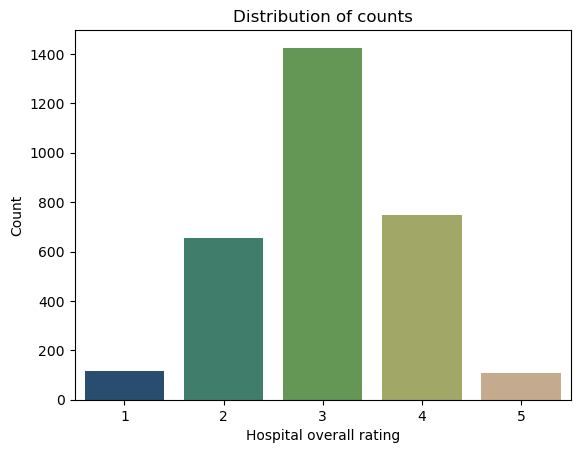

In [47]:
### How does the ratings distribution look like for all the hospitals?

sns.countplot(x='Hospital overall rating', data=df, palette='gist_earth')
plt.title('Distribution of counts')
plt.xlabel('Hospital overall rating')
plt.ylabel('Count')
plt.show()

Most of the hospitals have 3 has overall rating

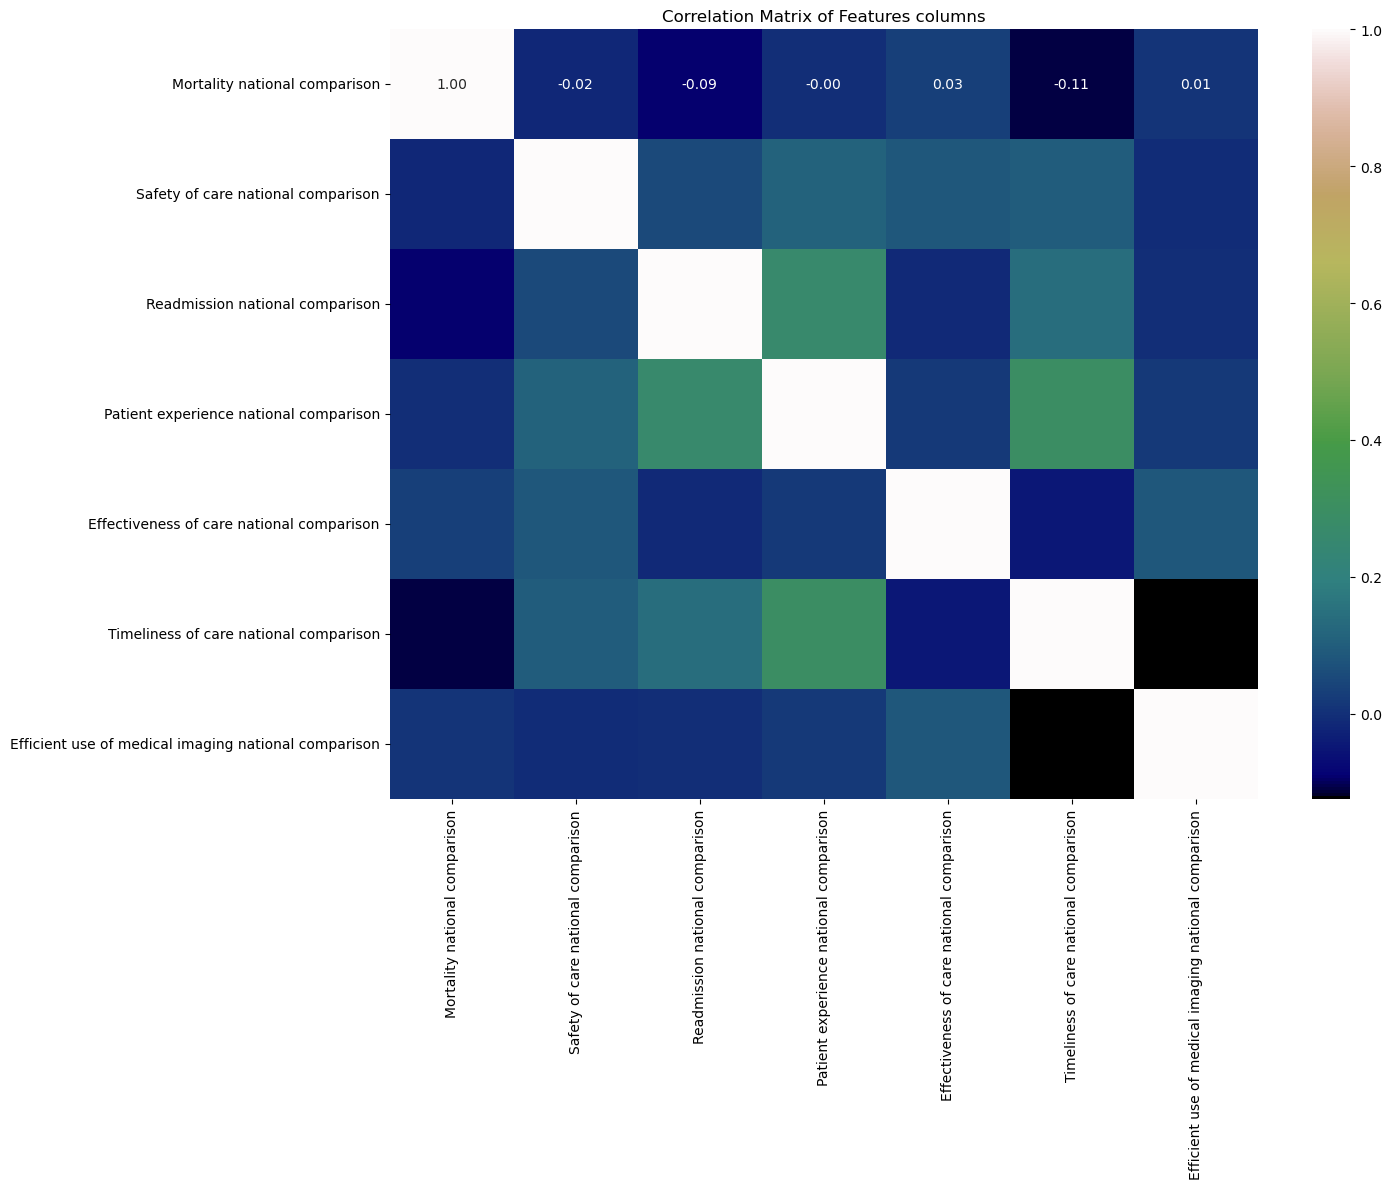

In [50]:
## Let's plot a correlation heatmap to check the correlation between the main measures stored in "features"
corr_matrix = df[features].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='gist_earth', fmt='.2f')
plt.title('Correlation Matrix of Features columns')
plt.show()

We don't see an high correlation between the features variables

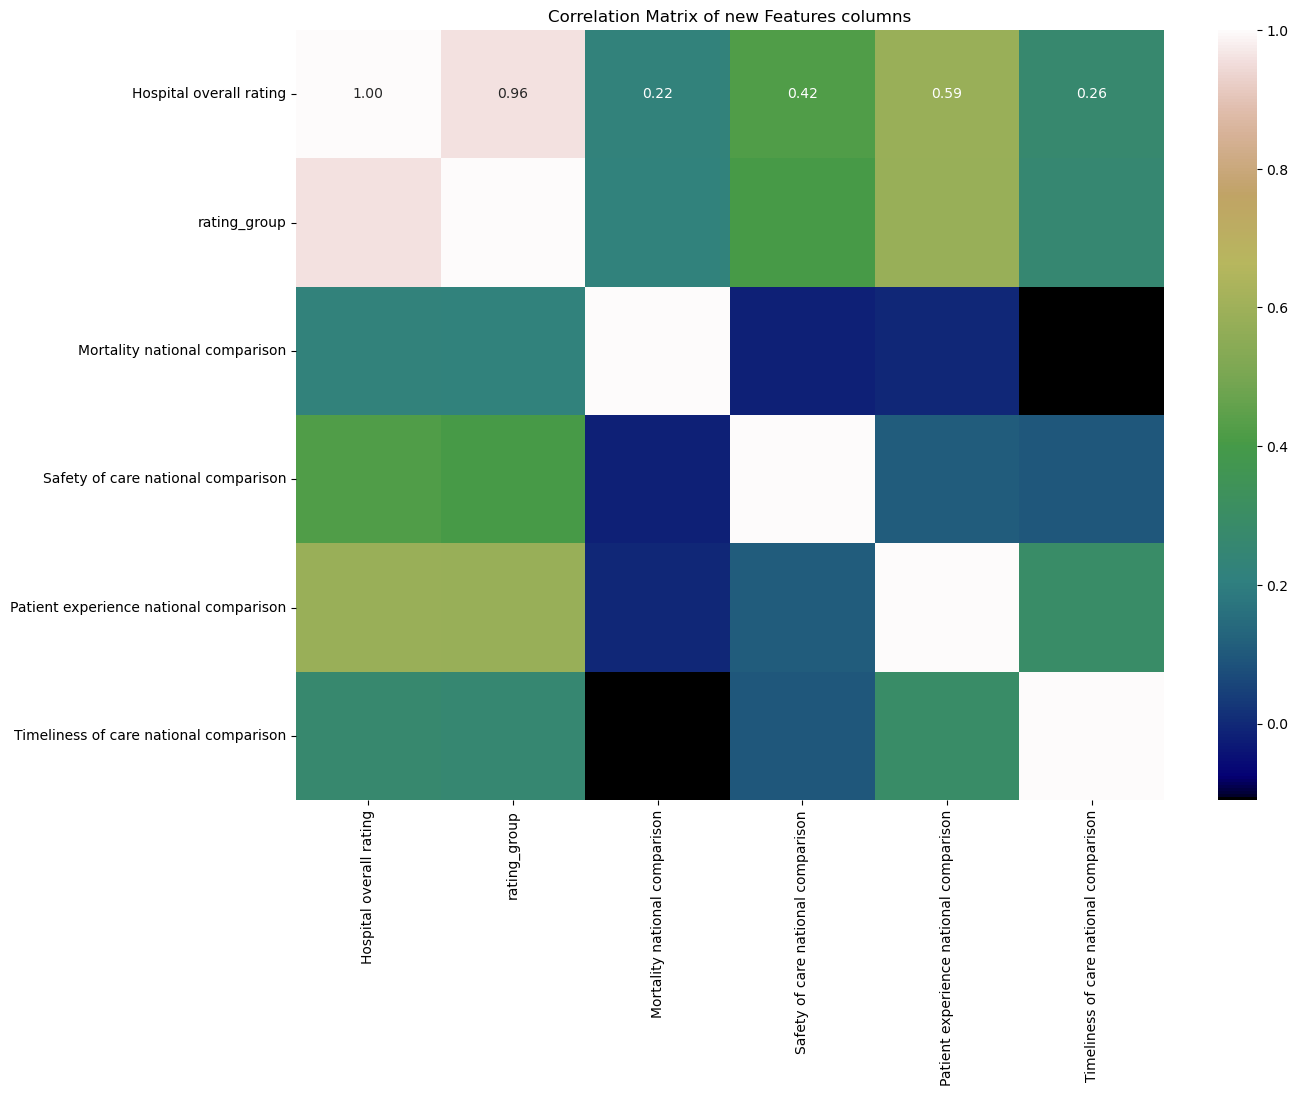

In [53]:
## Let's check the correlations between the "Hospital overall rating" and other measures
pd.options.display.float_format = "{:,.2f}".format
new_features = ['Hospital overall rating','rating_group','Mortality national comparison',
    'Safety of care national comparison','Patient experience national comparison','Timeliness of care national comparison']

corr_matrix = df[new_features].corr()
corr_matrix

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='gist_earth', fmt='.2f')
plt.title('Correlation Matrix of new Features columns')
plt.show()

The rating group has a strong correlation with the Hospital overall rating

Text(0.5, 1.0, 'Hospital overall rating accross states')

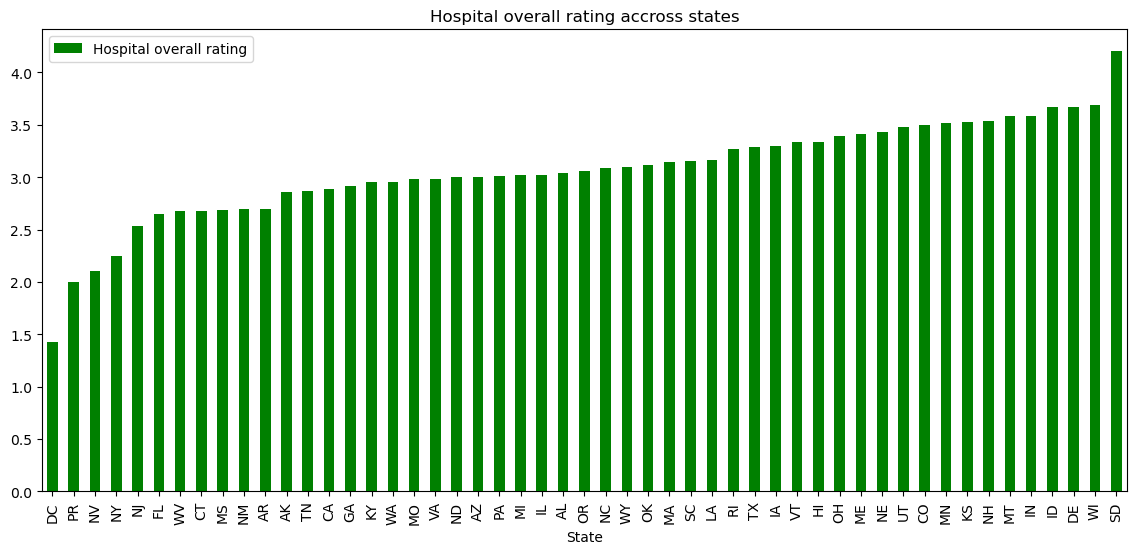

In [58]:
### Let's check how the hospital ratings vary across other parameters

fig1 = df.pivot_table('Hospital overall rating', index='State').sort_values(by='Hospital overall rating',ascending=True)
fig1.plot(kind='bar',figsize=(14, 6),color='green')
plt.title('Hospital overall rating accross states')

We can see that South Dakota (SD) state has the best Hospital overall ratings 
where District Columbia (DC) has the worst Hospital overall ratings 

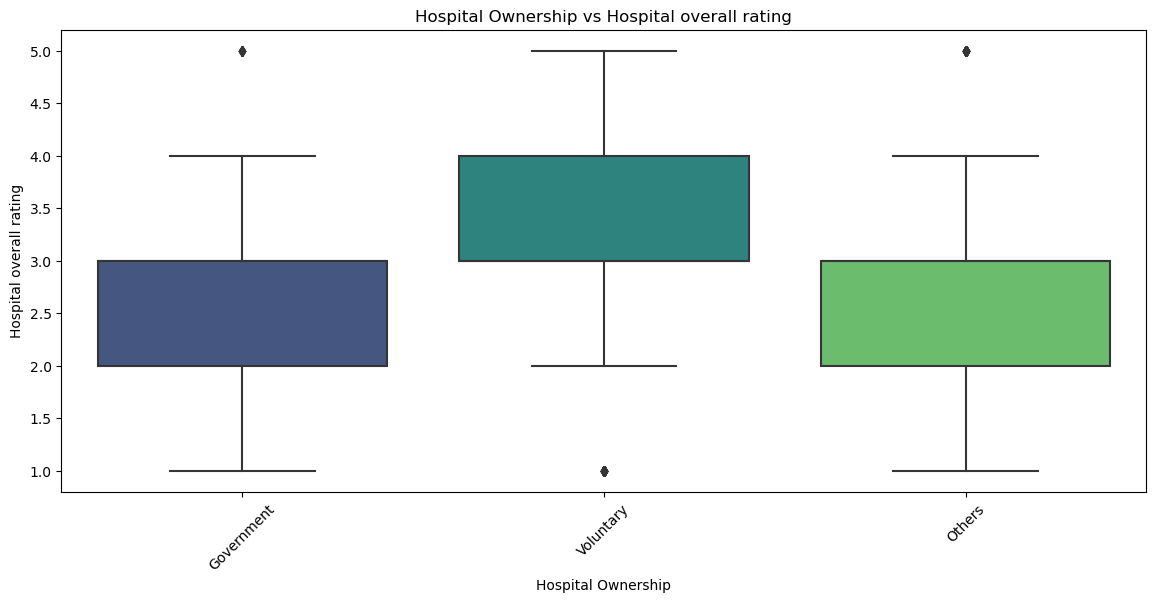

In [61]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Hospital Ownership', y='Hospital overall rating', data=df, palette='viridis')
plt.title('Hospital Ownership vs Hospital overall rating')
plt.xlabel('Hospital Ownership')
plt.ylabel('Hospital overall rating')
plt.xticks(rotation=45)
plt.show()

We can see that the voluntary ownership's hospitals have the best overall ratings. 

## Building machine learning models 

In [65]:
## let's drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [69]:
df2 = df.drop(demo_features,axis=1)
df2.head()

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,-12.50,-4.20,-9.30,-12.40,-15.50,-15.40,1.00,16.50,15.10,21.10,21.40,5.10,15.40,18.70,12.70,-99.00,-8.26,-2.00,-269.00,-68.00,97.00,81.00,-196.00,-65.00,-4.00,72.82,82.00,96.12,-0.00,99.00,96.00,100.00,67.00,98.00,99.00,97.00,99.00,91.00,90.00,-0.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,3.00,-3.80,-3.32,-5.72,-2.72,-1.35,-0.07,-168.26,-0.36,-0.12,-0.68,-1.74,-2.43,-1.43,-2.31,-1.87,-0.00,-0.42,-0.79,-6.40,-0.90,-7.10,-2.40,-38.10,-6.90
1,Government,Yes,3,0,1,2,1,1,2,0,-16.00,-3.33,-7.60,-15.50,-20.80,-15.50,1.00,16.70,14.41,18.00,21.90,5.70,14.90,16.40,13.40,-60.00,-12.00,-3.00,-243.00,-71.00,99.00,83.00,-117.00,-27.00,-2.00,92.00,92.00,99.00,-1.00,98.00,99.00,100.00,89.59,99.00,88.00,95.00,94.00,100.00,100.00,-2.03,2.00,3.00,4.00,3.00,3.00,3.00,4.00,2.00,4.00,4.00,3.00,3.00,-3.00,-5.63,-9.18,-2.11,-1.25,-0.14,-179.05,-0.47,-0.11,-0.85,-1.06,-0.65,-0.46,-0.70,-0.39,-0.87,-1.39,-0.41,-13.30,-10.20,-5.30,-4.00,-42.80,-5.10
2,Government,Yes,2,0,1,1,0,1,2,1,-16.70,-4.10,-7.10,-15.60,-18.20,-17.90,0.00,16.10,15.20,19.80,20.60,5.00,15.40,17.90,12.00,-58.00,-8.26,-2.00,-217.00,-78.00,100.00,87.00,-133.00,-10.00,-1.00,70.00,88.00,96.12,-0.00,99.00,100.00,100.00,89.59,99.00,97.00,98.00,89.00,86.00,92.00,-0.00,2.00,3.00,4.00,3.00,3.00,3.00,2.00,2.00,2.00,4.00,2.00,3.00,-3.80,-3.85,-10.25,-2.50,-1.93,-0.09,-198.33,-0.41,-0.24,-0.91,-0.34,-0.44,-0.64,-0.80,-0.31,-0.87,-1.26,-0.51,-11.80,-4.60,-0.00,-4.60,-45.60,-9.10
3,Voluntary,Yes,3,1,1,0,1,1,2,1,-14.05,-3.33,-9.30,-14.40,-18.80,-16.60,1.00,16.89,14.41,19.90,21.10,4.62,16.60,17.30,12.70,-90.00,-7.00,-0.00,-219.00,-68.00,99.00,53.00,-119.00,-38.00,-1.00,0.00,0.00,89.00,-2.42,80.00,85.00,100.00,89.59,100.00,71.00,97.00,99.00,93.22,92.86,-2.03,3.00,3.00,5.00,4.00,4.00,4.00,3.00,3.00,3.00,5.00,3.00,4.00,-3.04,-4.57,-9.89,-2.32,-1.20,-0.35,-136.77,-0.40,-0.16,-0.79,-0.54,-0.53,-0.00,-0.58,-0.96,-0.87,-0.99,-0.00,-24.30,-6.10,-4.72,-2.96,-39.96,-20.70
4,Others,Yes,3,1,1,1,1,1,2,1,-14.05,-3.33,-8.20,-12.70,-15

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Hospital Ownership                                    3057 non-null   object 
 1   Emergency Services                                    3057 non-null   object 
 2   Hospital overall rating                               3057 non-null   int64  
 3   Mortality national comparison                         3057 non-null   int64  
 4   Safety of care national comparison                    3057 non-null   int64  
 5   Readmission national comparison                       3057 non-null   int64  
 6   Patient experience national comparison                3057 non-null   int64  
 7   Effectiveness of care national comparison             3057 non-null   int64  
 8   Timeliness of care national comparison                3057

In [73]:
##Recheck the columns to see if anything else needs to be dropped

high_correlated_features = ['rating_group']

df2.drop(high_correlated_features,axis=1, inplace=True)

In [77]:
# Let's map the ratings. 
# 1,2,3 will be 0.
# 4,5 will be 1. 

df2['Hospital overall rating'] = df2['Hospital overall rating'].apply(lambda x: 0 if x <= 3 else 1)

In [79]:
df2['Hospital overall rating'].value_counts()

Hospital overall rating
0    2198
1     859
Name: count, dtype: int64

In [81]:
# Let's convert the datatypes of the categorical variables

df2['Hospital Ownership']

categoricals = ['Hospital Ownership','Emergency Services','Hospital overall rating']

for column in categoricals:
    df2[column] = pd.Categorical(df2[column])

In [83]:
# Let's verify again the data types 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Hospital Ownership                                    3057 non-null   category
 1   Emergency Services                                    3057 non-null   category
 2   Hospital overall rating                               3057 non-null   category
 3   Mortality national comparison                         3057 non-null   int64   
 4   Safety of care national comparison                    3057 non-null   int64   
 5   Readmission national comparison                       3057 non-null   int64   
 6   Patient experience national comparison                3057 non-null   int64   
 7   Effectiveness of care national comparison             3057 non-null   int64   
 8   Timeliness of care national comparison          

In [85]:
### Create X and y variable
y = df2['Hospital overall rating']
X = df2.drop(['Hospital overall rating'],axis=1)

In [89]:
### Create the dummy variables for categorical variables

X1 = pd.get_dummies(X, drop_first=False) #for kNN and trees
X2 = pd.get_dummies(X, drop_first=True) #for logistic regression


In [91]:
## Let's perform the train_test split to create the train and validation sets
## Split it in the ratio of 70-30

X_train,X_val,X2_train,X2_val,y_train,y_val = train_test_split(X1,X2,y,test_size=0.3,random_state=0)

In [93]:
# Let'scale and standardize the numerical variables
scaler = StandardScaler()

# We get the list of numerical variables
numerical_var = list(X.select_dtypes(exclude='category'))


X_train[numerical_var]= scaler.fit_transform(X_train[numerical_var])
X2_train[numerical_var]= scaler.fit_transform(X2_train[numerical_var])

X_val[numerical_var]= scaler.transform(X_val[numerical_var])
X2_val[numerical_var]= scaler.transform(X2_val[numerical_var])

### Model 1 - Logistic regression

In [96]:
log_clf_best = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, 
                                     max_iter=200).fit(X2_train, y_train)
log_train_acc = log_clf_best.score(X2_train, y_train)
log_val_acc = log_clf_best.score(X2_val, y_val)


### Model 2 - Decision Tree

In [99]:
best_ccp_alpha = 0.004801587301587302 
tree_clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha).fit(X_train,y_train)

tree_train_acc = tree_clf_best.score(X_train, y_train)
tree_val_acc = tree_clf_best.score(X_val, y_val)


### Model 3 - KNN

In [103]:
knn_clf_best = KNeighborsClassifier(n_neighbors=14).fit(X_train, y_train)

knn_train_acc = knn_clf_best.score(X_train, y_train)
knn_val_acc = knn_clf_best.score(X_val, y_val)

#### Summary of training and validation data on the three models

In [106]:
pd.DataFrame([[log_train_acc, log_val_acc], [tree_train_acc, tree_val_acc], 
              [knn_train_acc, knn_val_acc]], columns=['Training Accuracy', 'Validation Accuracy'], 
              index = ['Logistic Regression', 'Decision Tree', 'kNN model'])

,Training Accuracy,Validation Accuracy
Logistic Regression,0.98,0.96
Decision Tree,0.89,0.84
kNN model,0.88,0.86


### additional metrics

##### Confusion Matrix 

## Logistic Regression

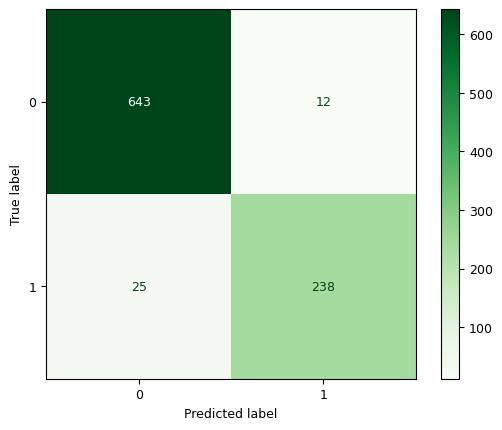

In [111]:
plt.rcParams.update({'font.size': 9}) 
ConfusionMatrixDisplay.from_estimator(log_clf_best,X2_val,y_val,cmap=plt.cm.Greens)

In [113]:
y_train_pred = log_clf_best.predict(X2_train)
y_val_pred = log_clf_best.predict(X2_val)

accuracy_score_log_reg = accuracy_score(y_val,y_val_pred)
f1_score_log_reg = f1_score(y_val,y_val_pred)
sensitivity_score_log = recall_score(y_val,y_val_pred,pos_label=1)
specificty_score_log = recall_score(y_val,y_val_pred,pos_label=0)

## Decision Tree

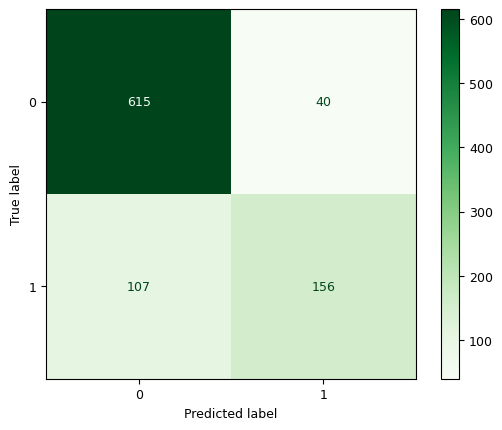

In [124]:
plt.rcParams.update({'font.size': 9}) # To make the plot labels easier to read
ConfusionMatrixDisplay.from_estimator(
        tree_clf_best,
        X_val,
        y_val,
        cmap=plt.cm.Greens,
    )

In [126]:
y_train_pred = tree_clf_best.predict(X_train)
y_val_pred = tree_clf_best.predict(X_val)

accuracy_score_tree = accuracy_score(y_val,y_val_pred)
f1_score_tree = f1_score(y_val,y_val_pred)
sensitivity_score_tree = recall_score(y_val,y_val_pred,pos_label=1)
specificty_score_tree = recall_score(y_val,y_val_pred,pos_label=0)

## KNN

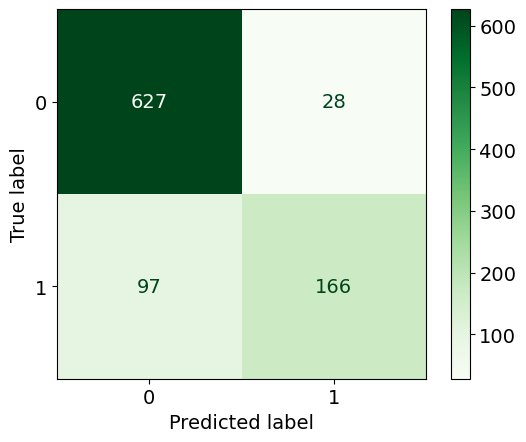

In [129]:
plt.rcParams.update({'font.size': 14}) # To make the plot labels easier to read
ConfusionMatrixDisplay.from_estimator(
        knn_clf_best,
        X_val,
        y_val,
        cmap=plt.cm.Greens,
    )

In [131]:
y_train_pred = knn_clf_best.predict(X_train)
y_val_pred = knn_clf_best.predict(X_val)

accuracy_score_knn = accuracy_score(y_val,y_val_pred)
f1_score_knn = f1_score(y_val,y_val_pred)
sensitivity_score_knn = recall_score(y_val,y_val_pred,pos_label=1)
specificty_score_knn = recall_score(y_val,y_val_pred,pos_label=0)

In [133]:
#Summary of Metrics
pd.DataFrame([[accuracy_score_log_reg, f1_score_log_reg,sensitivity_score_log,specificty_score_log],
              [accuracy_score_tree, f1_score_tree,sensitivity_score_tree,specificty_score_tree],
              [accuracy_score_knn, f1_score_knn,sensitivity_score_knn,specificty_score_knn]
             ]
             ,columns=['Accuracy Score', 'F1-Score','Sensitivity','Specificity'], 
              index = ['Logistic Regression','Decision Tree','KNN'])

,Accuracy Score,F1-Score,Sensitivity,Specificity
Logistic Regression,0.96,0.93,0.90,0.98
Decision Tree,0.84,0.68,0.59,0.94
KNN,0.86,0.73,0.63,0.96


We can see that the logistic regression is the best model to use in our case

In [140]:
# Let's use the best model to predicts to predict few new hospitals with no assigned ratings 
# Let's give recommendation to few hospitals that were rated low (0)

In [142]:
###Let's read the not_yet_rated dataset
new_df = pd.read_csv("not_yet_rated.csv")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           6 non-null      int64  
 1   Hospital Ownership                                    6 non-null      object 
 2   Emergency Services                                    6 non-null      object 
 3   Mortality national comparison                         6 non-null      int64  
 4   Safety of care national comparison                    6 non-null      int64  
 5   Readmission national comparison                       6 non-null      int64  
 6   Patient experience national comparison                6 non-null      int64  
 7   Effectiveness of care national comparison             6 non-null      int64  
 8   Timeliness of care national comparison                6 non-null

In [144]:
## Check the top 5 rows
new_df.head()

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,-12.50,-3.33,-8.20,-13.60,-14.10,-15.20,2,15.90,14.41,21.20,20.50,5.40,15.00,16.30,11.80,-43.00,-5.00,-1,-212,-76,98,99,-161,-18,0,100.00,100.00,99.00,-4.00,100.00,97.86,99.07,89.59,98.20,100.00,100,100.00,100.00,100.00,0.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,3.00,4.00,3.00,4.00,4.00,-3.20,-3.58,-7.19,-2.12,-1.88,-0.14,-135.66,-0.33,-0.12,-0.83,-0.41,-0.50,-0.19,-0.40,-0.37,-1.28,0.00,-0.57,-3.10,-0.50,-6.10,-2.90,-41.00,-6.10
1,520189,Government,Yes,2,1,2,2,2,2,1,-13.80,-3.33,-8.10,-11.80,-16.10,-16.60,2,16.89,14.41,18.80,22.70,4.70,14.20,18.30,12.80,-32.00,-6.00,-1,-198,-64,100,98,-127,-9,0,100.00,100.00,98.00,-1.00,100.00,97.86,99.07,89.59,98.20,100.00,100,99.00,94.00,95.00,-2.03,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,-3.30,-5.01,-9.20,-2.17,-1.32,-1.40,-127.39,-0.42,-0.14,-0.92,-0.51,-1.29,-0.16,-0.51,-1.17,0.00,-0.99,-0.83,-6.70,-0.30,-5.40,-1.90,-41.10,-5.30
2,370029,Government,No,1,1,1,1,1,2,1,-14.05,-3.33,-7.90,-11.80,-17.00,-15.90,1,16.89,14.41,19.60,23.10,4.62,15.20,16.80,12.90,-30.00,-11.00,0,-207,-67,100,94,-95,-5,-1,72.82,80.31,92.00,0.00,85.00,97.86,99.07,89.59,98.20,95.63,91,95.00,93.22,92.86,-2.03,3.00,3.00,5.00,4.00,4.00,4.00,4.00,2.00,4.00,4.00,3.00,4.00,-3.04,-5.17,-10.25,-2.32,-1.64,-0.44,-136.77,-0.40,-0.17,-0.94,-0.54,-0.53,-0.48,-0.58,-0.96,-0.87,-0.99,0.00,-18.70,-13.90,-4.72,-2.96,-39.96,-8.30
3,370032,Others,Yes,1,2,1,0,1,1,1,-15.70,-3.40,-7.90,-11.20,-17.50,-17.30,1,16.70,13.80,19.50,20.80,4.30,15.40,16.90,13.20,-60.00,-8.26,-1,-252,-84,97,81,-112,-20,-2,100.00,100.00,96.12,-5.00,100.00,97.86,99.07,89.59,98.20,100.00,97,92.00,96.00,100.00,-2.03,2.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,3.00,3.00,2.00,3.00,-2.70,-2.32,-12.90,-2.14,-1.57,-0.17,-145.46,-0.38,-0.22,-0.75,-0.14,-0.20,0.00,0.00,0.00,-0.87,-0.99,-0.92,-10.90,-2.70,-1.10,-4.50,-53.20,-10.50
4,370036,Government,Yes,1,1,1,1,0,2,1,-14.05,-3.33,-7.10,-11.30,-18.30,-14.89,1,16.89,14.41,20.80,21.90,4.62,16.40,19.20,12.59,-54.15,-8.26,0,-128,-20,81,93,-115,-25,-1,72.82,8

In [146]:
new_df = new_df.drop(['Provider ID','rating_group'],axis=1)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Hospital Ownership                                    6 non-null      object 
 1   Emergency Services                                    6 non-null      object 
 2   Mortality national comparison                         6 non-null      int64  
 3   Safety of care national comparison                    6 non-null      int64  
 4   Readmission national comparison                       6 non-null      int64  
 5   Patient experience national comparison                6 non-null      int64  
 6   Effectiveness of care national comparison             6 non-null      int64  
 7   Timeliness of care national comparison                6 non-null      int64  
 8   Efficient use of medical imaging national comparison  6 non-null

In [148]:
categoricals = ['Hospital Ownership','Emergency Services']


for column in categoricals:
    new_df[column] = pd.Categorical(new_df[column])

In [150]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Hospital Ownership                                    6 non-null      category
 1   Emergency Services                                    6 non-null      category
 2   Mortality national comparison                         6 non-null      int64   
 3   Safety of care national comparison                    6 non-null      int64   
 4   Readmission national comparison                       6 non-null      int64   
 5   Patient experience national comparison                6 non-null      int64   
 6   Effectiveness of care national comparison             6 non-null      int64   
 7   Timeliness of care national comparison                6 non-null      int64   
 8   Efficient use of medical imaging national comparison  

In [152]:
X_unseen = new_df

In [154]:
# We create dummies for unseen data
X3 = pd.get_dummies(X_unseen,drop_first=True) #for logistic regression
X3

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score,Hospital Ownership_Others,Hospital Ownership_Voluntary,Emergency Services_Yes
0,1,1,2,2,2,2,1,-12.50,-3.33,-8.20,-13.60,-14.10,-15.20,15.90,14.41,21.20,20.50,5.40,15.00,16.30,11.80,-43.00,-5.00,-1,-212,-76,98,99,-161,-18,0,100.00,100.00,99.00,-4.00,100.00,97.86,99.07,89.59,98.20,100.00,100,100.00,100.00,100.00,0.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,3.00,4.00,3.00,4.00,4.00,-3.20,-3.58,-7.19,-2.12,-1.88,-0.14,-135.66,-0.33,-0.12,-0.83,-0.41,-0.50,-0.19,-0.40,-0.37,-1.28,0.00,-0.57,-3.10,-0.50,-6.10,-2.90,-41.00,-6.10,False,True,True
1,2,1,2,2,2,2,1,-13.80,-3.33,-8.10,-11.80,-16.10,-16.60,16.89,14.41,18.80,22.70,4.70,14.20,18.30,12.80,-32.00,-6.00,-1,-198,-64,100,98,-127,-9,0,100.00,100.00,98.00,-1.00,100.00,97.86,99.07,89.59,98.20,100.00,100,99.00,94.00,95.00,-2.03,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,-3.30,-5.01,-9.20,-2.17,-1.32,-1.40,-127.39,-0.42,-0.14,-0.92,-0.51,-1.29,-0.16,-0.51,-1.17,0.00,-0.99,-0.83,-6.70,-0.30,-5.40,-1.90,-41.10,-5.30,False,False,True
2,1,1,1,1,1,2,1,-14.05,-3.33,-7.90,-11.80,-17.00,-15.90,16.89,14.41,19.60,23.10,4.62,15.20,16.80,12.90,-30.00,-11.00,0,-207,-67,100,94,-95,-5,-1,72.82,80.31,92.00,0.00,85.00,97.86,99.07,89.59,98.20,95.63,91,95.00,93.22,92.86,-2.03,3.00,3.00,5.00,4.00,4.00,4.00,4.00,2.00,4.00,4.00,3.00,4.00,-3.04,-5.17,-10.25,-2.32,-1.64,-0.44,-136.77,-0.40,-0.17,-0.94,-0.54,-0.53,-0.48,-0.58,-0.96,-0.87,-0.99,0.00,-18.70,-13.90,-4.72,-2.96,-39.96,-8.30,False,False,False
3,1,2,1,0,1,1,1,-15.70,-3.40,-7.90,-11.20,-17.50,-17.30,16.70,13.80,19.50,20.80,4.30,15.40,16.90,13.20,-60.00,-8.26,-1,-252,-84,97,81,-112,-20,-2,100.00,100.00,96.12,-5.00,100.00,97.86,99.07,89.59,98.20,100.00,97,92.00,96.00,100.00,-2.03,2.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,3.00,3.00,2.00,3.00,-2.70,-2.32,-12.90,-2.14,-1.57,-0.17,-145.46,-0.38,-0.22,-0.75,-0.14,-0.20,0.00,0.00,0.00,-0.87,-0.99,-0.92,-10.90,-2.70,-1.10,-4.50,-53.20,-10.50,True,False,True
4,1,1,1,1,0,2,1,-14.05,-3.33,-7.10,-11.30,-18.30,-14.89,16.89,14.41,20.80,21.90,4.62,16.40,19.20,12.59,-54.15,-8.26,0,-128,-20,81,93,-115,-25,-1,72.82,80.31,96.12,-2.42,96.59,97.86,99.

In [156]:
# Scale and Standardize the numerical variables
scaler = StandardScaler()

# We get the list of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_var = list(X3.select_dtypes(include=numerics).columns)

numerical_var

X3[numerical_var] = scaler.fit_transform(X3[numerical_var])

In [158]:
# # Make prediction on not_yet_rated.csv
# translation_result = lambda x: "High" if x == 1 else "Low"

results_predictions = log_clf_best.predict(X3)

# We are going to create a little summary of the hospitals
features = [
    'Hospital Ownership','Emergency Services','Mortality national comparison',
    'Safety of care national comparison','Effectiveness of care national comparison',
    'Efficient use of medical imaging national comparison'
]

summary_df = pd.concat([
    new_df,
    pd.DataFrame(results_predictions, columns=["Hospital overall ratings"])],axis=1
)

summary_df


,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,READM_30_AMI_Score,READM_30_CABG_Score,READM_30_COPD_Score,READM_30_HF_Score,READM_30_HIP_KNEE_Score,READM_30_HOSP_WIDE_Score,READM_30_PN_Score,READM_30_STK_Score,TIME_OP_21_Score,TIME_OP_5_Score,EFF_EDV_Score,EFF_ED_1b_Score,EFF_ED_2b_Score,EFF_IMM_2_Score,EFF_IMM_3_OP_27_FAC_ADHPCT_Score,EFF_OP_18b_Score,EFF_OP_20_Score,EFF_OP_22_Score,EFF_OP_29_Score,EFF_OP_30_Score,EFF_OP_4_Score,EFF_PC_01_Score,EFF_STK_1_Score,EFF_STK_10_Score,EFF_STK_2_Score,EFF_STK_4_Score,EFF_STK_5_Score,EFF_STK_6_Score,EFF_VTE_1_Score,EFF_VTE_2_Score,EFF_VTE_3_Score,EFF_VTE_5_Score,EFF_VTE_6_Score,EXP_H_CLEAN_STAR_RATING_Score,EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_2_STAR_RATING_Score,EXP_H_COMP_3_STAR_RATING_Score,EXP_H_COMP_4_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score,EXP_H_COMP_7_STAR_RATING_Score,EXP_H_HSP_RATING_STAR_RATING_Score,EXP_H_QUIET_STAR_RATING_Score,EXP_H_RECMND_STAR_RATING_Score,EXP_H_STAR_RATING_Score,SAFETY_COMP_HIP_KNEE_Score,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,SAFETY_PSI_13_POST_SEPSIS_Score,SAFETY_PSI_14_POSTOP_DEHIS_Score,SAFETY_PSI_15_ACC_LAC_Score,SAFETY_PSI_3_ULCER_Score,SAFETY_PSI_4_SURG_COMP_Score,SAFETY_PSI_6_IAT_PTX_Score,SAFETY_PSI_7_CVCBI_Score,SAFETY_PSI_90_SAFETY_Score,SAFETY_HAI_1_SIR_Score,SAFETY_HAI_1a_SIR_Score,SAFETY_HAI_2_SIR_Score,SAFETY_HAI_2a_SIR_Score,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score,Hospital overall ratings
0,Voluntary,Yes,1,1,2,2,2,2,1,-12.50,-3.33,-8.20,-13.60,-14.10,-15.20,15.90,14.41,21.20,20.50,5.40,15.00,16.30,11.80,-43.00,-5.00,-1,-212,-76,98,99,-161,-18,0,100.00,100.00,99.00,-4.00,100.00,97.86,99.07,89.59,98.20,100.00,100,100.00,100.00,100.00,0.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,3.00,4.00,3.00,4.00,4.00,-3.20,-3.58,-7.19,-2.12,-1.88,-0.14,-135.66,-0.33,-0.12,-0.83,-0.41,-0.50,-0.19,-0.40,-0.37,-1.28,0.00,-0.57,-3.10,-0.50,-6.10,-2.90,-41.00,-6.10,1
1,Government,Yes,2,1,2,2,2,2,1,-13.80,-3.33,-8.10,-11.80,-16.10,-16.60,16.89,14.41,18.80,22.70,4.70,14.20,18.30,12.80,-32.00,-6.00,-1,-198,-64,100,98,-127,-9,0,100.00,100.00,98.00,-1.00,100.00,97.86,99.07,89.59,98.20,100.00,100,99.00,94.00,95.00,-2.03,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,-3.30,-5.01,-9.20,-2.17,-1.32,-1.40,-127.39,-0.42,-0.14,-0.92,-0.51,-1.29,-0.16,-0.51,-1.17,0.00,-0.99,-0.83,-6.70,-0.30,-5.40,-1.90,-41.10,-5.30,1
2,Government,No,1,1,1,1,1,2,1,-14.05,-3.33,-7.90,-11.80,-17.00,-15.90,16.89,14.41,19.60,23.10,4.62,15.20,16.80,12.90,-30.00,-11.00,0,-207,-67,100,94,-95,-5,-1,72.82,80.31,92.00,0.00,85.00,97.86,99.07,89.59,98.20,95.63,91,95.00,93.22,92.86,-2.03,3.00,3.00,5.00,4.00,4.00,4.00,4.00,2.00,4.00,4.00,3.00,4.00,-3.04,-5.17,-10.25,-2.32,-1.64,-0.44,-136.77,-0.40,-0.17,-0.94,-0.54,-0.53,-0.48,-0.58,-0.96,-0.87,-0.99,0.00,-18.70,-13.90,-4.72,-2.96,-39.96,-8.30,0
3,Others,Yes,1,2,1,0,1,1,1,-15.70,-3.40,-7.90,-11.20,-17.50,-17.30,16.70,13.80,19.50,20.80,4.30,15.40,16.90,13.20,-60.00,-8.26,-1,-252,-84,97,81,-112,-20,-2,100.00,100.00,96.12,-5.00,100.00,97.86,99.07,89.59,98.20,100.00,97,92.00,96.00,100.00,-2.03,2.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,3.00,3.00,2.00,3.00,-2.70,-2.32,-12.90,-2.14,-1.57,-0.17,-145.46,-0.38,-0.22,-0.75,-0.14,-0.20,0.00,0.00,0.00,-0.87,-0.99,-0.92,-10.90,-2.70,-1.10,-4.50,-53.20,-10.50,0
4,Government,Yes,1,1,1,1,0,2,1,-14.05,-3.33,-7.10,-11.30,-18.30,-14.89,16.89,14.41,20.80,21.90,4.62,16.40,19.20,12.59,-54.15,-8.26,0,-128,-20,81,93,-115,-25,-1,72.82,80.31,96.12,-2.42,96.59,97.86,99.07,89

Our machine Learning model (Logistic regression) predicts the results for the not_rated dataset with :
- 1 as High
- 0 as Low

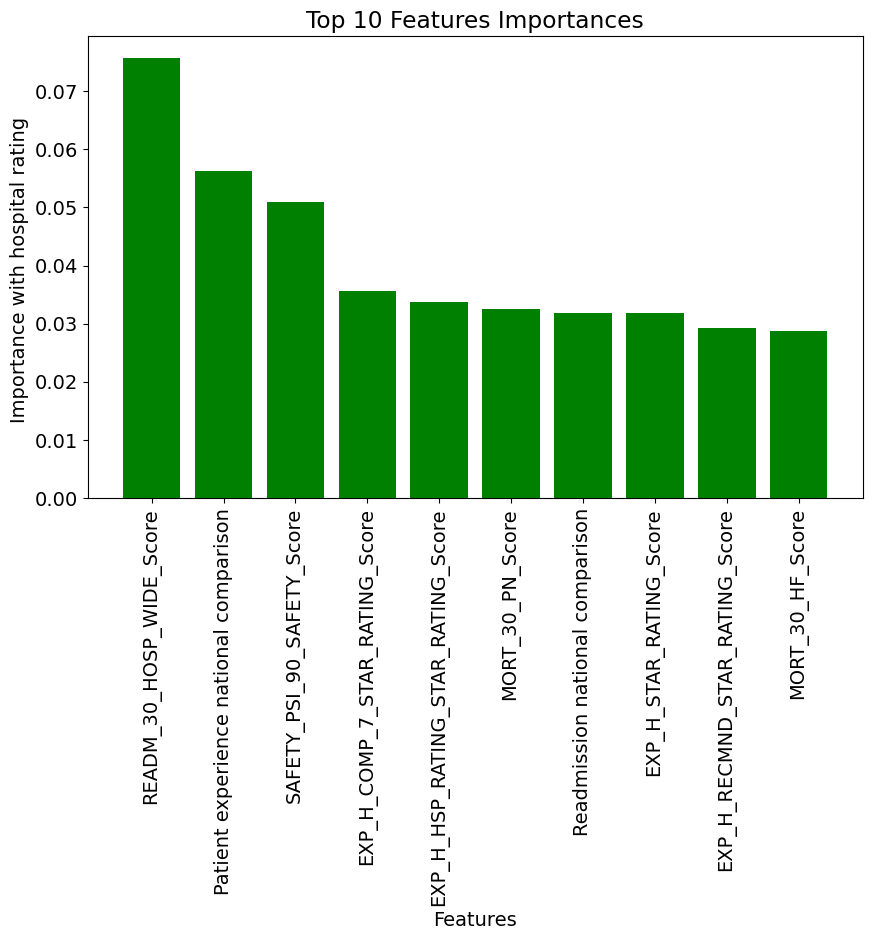

In [161]:
# We are going to use feature importances with a forest of trees
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(random_state=0)
forest.fit(X2_train, y_train)

importances = forest.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
top_features = sorted_indices[:10]
top_importances = importances[top_features]
top_feature_names = X2_train.columns[top_features] 


plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances, tick_label=top_feature_names,color='green')
plt.xlabel('Features')
plt.ylabel('Importance with hospital rating ')
plt.title('Top 10 Features Importances')
plt.xticks(rotation=90)
plt.show()

We can see that improving READM_30_HOSP_WIDE_SCORE, patient experience national comparison, and SAFETY_PSI_90_SAFETY_SCORE have a better chance for the hospitals to be rated High for the overall ratings